In [47]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

filepath = r'C:\Users\aarus\Documents\ML\League Dataset\high_diamond_ranked_10min.csv'
df = pd.read_csv(filepath, index_col="gameId")

print(df.head())

            blueWins  blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  \
gameId                                                                      
4519157822         0               28                   2               1   
4523371949         0               12                   1               0   
4521474530         0               15                   0               0   
4524384067         0               43                   1               0   
4436033771         0               75                   4               0   

            blueKills  blueDeaths  blueAssists  blueEliteMonsters  \
gameId                                                              
4519157822          9           6           11                  0   
4523371949          5           5            5                  0   
4521474530          7          11            4                  1   
4524384067          4           5            5                  1   
4436033771          6           6            6

In [50]:
cols = list(df.columns)
drop_cols = ["blueWins"] + cols[20:]
print(drop_cols)
X = df.drop(drop_cols, axis=1)
y = df["blueWins"]
print(X)
print(y)

['blueWins', 'redWardsPlaced', 'redWardsDestroyed', 'redFirstBlood', 'redKills', 'redDeaths', 'redAssists', 'redEliteMonsters', 'redDragons', 'redHeralds', 'redTowersDestroyed', 'redTotalGold', 'redAvgLevel', 'redTotalExperience', 'redTotalMinionsKilled', 'redTotalJungleMinionsKilled', 'redGoldDiff', 'redExperienceDiff', 'redCSPerMin', 'redGoldPerMin']
            blueWardsPlaced  blueWardsDestroyed  blueFirstBlood  blueKills  \
gameId                                                                       
4519157822               28                   2               1          9   
4523371949               12                   1               0          5   
4521474530               15                   0               0          7   
4524384067               43                   1               0          4   
4436033771               75                   4               0          6   
...                     ...                 ...             ...        ...   
4527873286           

In [51]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

In [52]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X_train)

X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [53]:
from sklearn.neighbors import KNeighborsClassifier
classifier = KNeighborsClassifier(n_neighbors=5)
classifier.fit(X_train, y_train)

KNeighborsClassifier()

In [54]:
y_pred = classifier.predict(X_test)

In [55]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[686 319]
 [321 650]]
              precision    recall  f1-score   support

           0       0.68      0.68      0.68      1005
           1       0.67      0.67      0.67       971

    accuracy                           0.68      1976
   macro avg       0.68      0.68      0.68      1976
weighted avg       0.68      0.68      0.68      1976



In [24]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train, y_train)
    pred_i = knn.predict(X_test)
    error.append(np.mean(pred_i != y_test))

Text(0, 0.5, 'Mean Error')

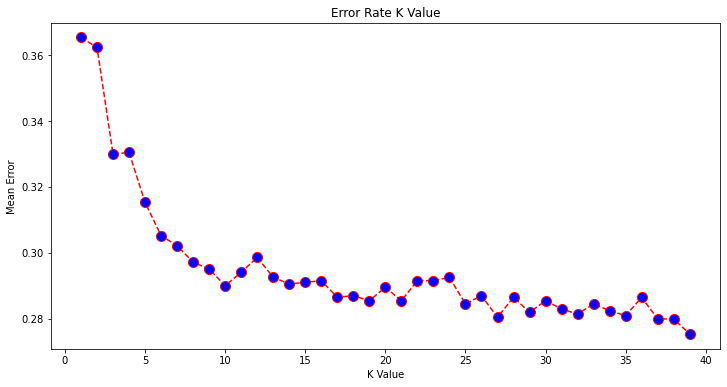

In [25]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [26]:
%matplotlib inline

In [27]:
#Trying out the support vector machine
from sklearn.svm import SVC
svclassifier = SVC(kernel='linear')
svclassifier.fit(X_train, y_train)

SVC(kernel='linear')

In [28]:
y_pred = svclassifier.predict(X_test)

In [29]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[706 265]
 [275 730]]
              precision    recall  f1-score   support

           0       0.72      0.73      0.72       971
           1       0.73      0.73      0.73      1005

    accuracy                           0.73      1976
   macro avg       0.73      0.73      0.73      1976
weighted avg       0.73      0.73      0.73      1976



In [33]:
#trying out decision tree classifier
from sklearn.tree import DecisionTreeClassifier
classifier = DecisionTreeClassifier()
classifier.fit(X_train, y_train)

DecisionTreeClassifier()

In [31]:
y_pred = classifier.predict(X_test)

In [32]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[614 357]
 [371 634]]
              precision    recall  f1-score   support

           0       0.62      0.63      0.63       971
           1       0.64      0.63      0.64      1005

    accuracy                           0.63      1976
   macro avg       0.63      0.63      0.63      1976
weighted avg       0.63      0.63      0.63      1976



In [40]:
from sklearn.ensemble import RandomForestClassifier

regressor = RandomForestClassifier(n_estimators=20, random_state=0)
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)


In [41]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test, y_pred))

[[721 250]
 [336 669]]
              precision    recall  f1-score   support

           0       0.68      0.74      0.71       971
           1       0.73      0.67      0.70      1005

    accuracy                           0.70      1976
   macro avg       0.71      0.70      0.70      1976
weighted avg       0.71      0.70      0.70      1976

0.7034412955465587


Text(0, 0.5, 'Mean Error')

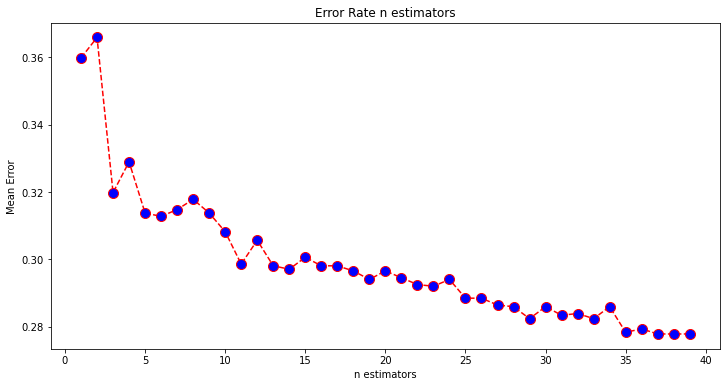

In [42]:
error = []

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    regressor = RandomForestClassifier(n_estimators=i, random_state=0)
    regressor.fit(X_train, y_train)
    pred_i = regressor.predict(X_test)
    error.append(np.mean(pred_i != y_test))
    
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate n estimators')
plt.xlabel('n estimators')
plt.ylabel('Mean Error')